# Consider the following function

***Note***: **Ploting markers are optional for this assignment**

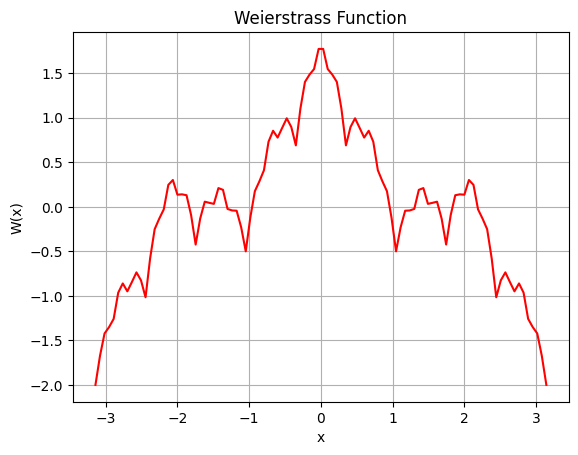

In [6]:
#Name Huzaifa Nasir
#Roll Number 22i-1053
#Section A
import numpy as np
import numpy.linalg as npl
import scipy.sparse as sps
import matplotlib.pyplot as plt

# Weierstrass function
def W(x, a=0.5, b=3, terms=100):
    return sum(a**n * np.cos(b**n * x) for n in range(terms))

# Generate x values
num_points = 100
x = np.linspace(-np.pi, np.pi, num_points)

# Compute the Weierstrass function for all x
W_values = W(x)

# Plotting
plt.plot(x, W_values, color='red')
plt.title('Weierstrass Function')
plt.xlabel('x')
plt.ylabel('W(x)')
plt.grid()
plt.show()


- You are provided with data for 𝑥 and 𝑊 containing a predefined Monster function. Your task is to construct 𝑝(𝑥) for 12 points (for lagrange and newton method) for spline see following table, and then you need to test how closely 𝑝(𝑥) approximates the values of the mentioned function. You must also calculate the RMSE and plot the results step by step as demonstrated in this notebook. Also fill the values from your experment in following table.

# Comparison of Interpolation Techniques

| Interpolation Method             | RMSE  | Comments/Limitations                        |
|:--------------------------------:|:-----:|:------------------------------------------:|
| Lagrange                         |   0.32465   | Can be unstable for large datasets; sensitive to oscillation.                                          |
| Newton's Divided Difference       |   0.32465   | Requires divided difference computation, but can handle large data better than Lagrange.                                          |
| Cubic Spline (n = 12)            |   0.28850   | Smooth and stable; works well for smaller intervals.                                          |
| Cubic Spline (n = 24)            |   0.14753   | More accurate approximation with more data points.                                          |
| Cubic Spline (n = 48)            |   0.12084   | Higher accuracy but may require more computation.                                          |


In [7]:
import math

# Complete the following function
def RMSE(y_actual, y_predicted):
    # Calculate the Mean Squared Error (MSE)
    mse = sum((a - p) ** 2 for a, p in zip(y_actual, y_predicted)) / len(y_actual)

    return math.sqrt(mse)

# import numpy as np
# print(np.__version__)

# !pip install --upgrade numpy
# !pip install --force-reinstall matplotlib


## Lagrange: Compute $L_i(x)$ here

In [8]:
def lagrange_basis(z, x):
    basis = []
    n = len(x)
    for i in range(n):
        # Start with 1 for the product term
        l_i = 1
        for j in range(n):
            if i != j:  # Exclude the i-th term
                l_i *= (z - x[j]) / (x[i] - x[j])

        basis.append(l_i)
    return basis

## Lagrange: Calculate $p(x)$ through $L_i(x)$

In [9]:
def lagrange_interpolant(z, x, y):
    P = np.zeros_like(z, dtype=float)

    for k in range(len(z)):
        # Compute the Lagrange basis for the current z[k]
        basis = lagrange_basis(z[k], x)
        # Sum up the contributions from each basis polynomial
        P[k] = sum(y[i] * basis[i] for i in range(len(x)))
    return P

## Lagrange: Testing

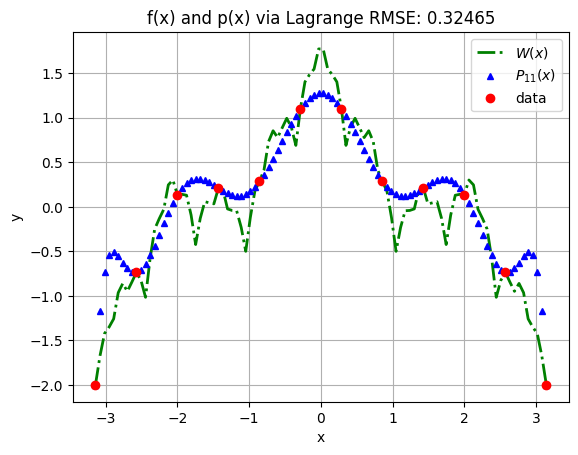

In [10]:
# plot your results as according to following example, you must provide RMSE Value as well
x = np.linspace(-np.pi, np.pi, 100)
y_actual = W(x)
x_data = np.linspace(-np.pi, np.pi, 12)
y_data = W(x_data)
# Compute the Lagrange interpolant for x
y_predicted = lagrange_interpolant(x, x_data, y_data)
# Compute the RMSE
rmse_value = RMSE(y_actual, y_predicted)

plt.plot(x, y_actual, 'g-.', label='$W(x)$', linewidth=2)
plt.plot(x, y_predicted, 'b^', label='$P_{11}(x)$', markersize=5)
plt.plot(x_data, y_data, 'ro', label='data')
plt.title(f"f(x) and p(x) via Lagrange RMSE: {rmse_value:.5f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [11]:
# Complete the following two functions for newton method
def poly_coeffs(x, y):
    n = len(x)
    a = np.zeros((n, n))
    a[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            a[i, j] = (a[i + 1, j - 1] - a[i, j - 1]) / (x[i + j] - x[i])

    return a[0, :]
#========================================================================
def poly_evaluation(a, x, z):
    n = len(a)
    p = a[n - 1]
    for i in range(n - 2, -1, -1):
        p = a[i] + (z - x[i]) * p

    return p

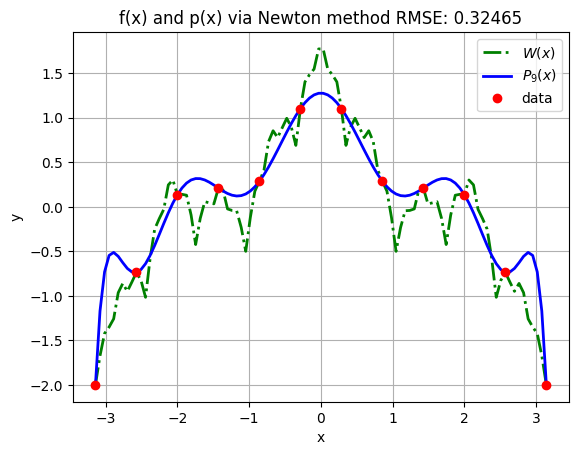

In [12]:
# plot your results as according to following example, you must provide RMSE Value as well
x = np.linspace(-np.pi, np.pi, 100)
y_actual = W(x)
x_data = np.linspace(-np.pi, np.pi, 12)
y_data = W(x_data)
coeffs = poly_coeffs(x_data, y_data)
y_predicted = np.array([poly_evaluation(coeffs, x_data, z) for z in x])
rmse_value = RMSE(y_actual, y_predicted)

plt.plot(x, y_actual, 'g-.', label='$W(x)$', linewidth=2)
plt.plot(x, y_predicted, 'b-', label='$P_9(x)$', linewidth=2)
plt.plot(x_data, y_data, 'ro', label='data')
plt.title(f"f(x) and p(x) via Newton method RMSE: {rmse_value:.5f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [13]:
def MyCubicSpline(x, y, dy0, dyN):
    n = len(x) - 1
    h = np.diff(x)
    alpha = np.zeros(n+1)
    alpha[0] = (3 * (y[1] - y[0]) / h[0]) - 3 * dy0
    alpha[-1] = 3 * dyN - 3 * (y[-1] - y[-2]) / h[-1]

    for i in range(1, n):
        alpha[i] = (3 / h[i]) * (y[i+1] - y[i]) - (3 / h[i-1]) * (y[i] - y[i-1])

    l = np.ones(n+1)
    mu = np.zeros(n)
    z = np.zeros(n+1)
    c = np.zeros(n+1)
    l[0] = 2 * h[0]
    mu[0] = 0.5
    z[0] = alpha[0] / l[0]

    for i in range(1, n):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

    l[-1] = h[-1] * (2 - mu[-2])
    z[-1] = (alpha[-1] - h[-1] * z[-2]) / l[-1]
    c[-1] = z[-1]
    for j in range(n-1, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]

    b = np.zeros(n)
    d = np.zeros(n)
    a = np.array(y[:-1])
    for i in range(n):
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (c[i+1] + 2 * c[i]) / 3
        d[i] = (c[i+1] - c[i]) / (3 * h[i])

    return list(zip(a, b, c[:-1], d))

In [14]:
def EvalCubicSpline(x, y, z, xx):
    yy = np.zeros_like(xx)
    for i, xi in enumerate(xx):
        for j in range(len(x) - 1):
            if x[j] <= xi <= x[j + 1]:
                a, b, c, d = z[j]
                h = xi - x[j]
                yy[i] = a + b * h + c * h**2 + d * h**3
                break

    return yy


In [ ]:
# n=12
# x = np.linspace(-np.pi, np.pi, n)
# y = W(x)
# z = dW(x)

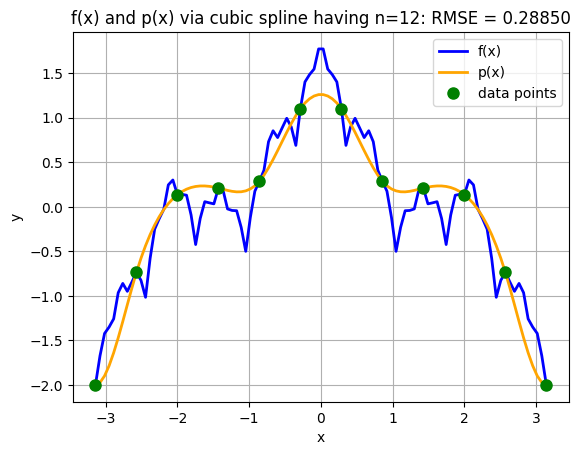

In [15]:
# plot your results as according to following example, you must provide RMSE Value as well
def dW(x, a=0.5, b=3, terms=100, h=1e-5):
    # Finite difference method: f'(x) ≈ (f(x + h) - f(x - h)) / (2 * h)
    return (W(x + h, a, b, terms) - W(x - h, a, b, terms)) / (2 * h)

n = 12
x = np.linspace(-np.pi, np.pi, n)
y = W(x)
dy0 = dW(x[0])
dyN = dW(x[-1])

spline_coeffs = MyCubicSpline(x, y, dy0, dyN)
xx = np.linspace(-np.pi, np.pi, 100)
yy = EvalCubicSpline(x, y, spline_coeffs, xx)
y_actual = W(xx)
rmse_value = RMSE(y_actual, yy)

plt.plot(xx, y_actual, 'b-', label='f(x)', linewidth=2)
plt.plot(xx, yy, 'orange', label='p(x)', linewidth=2)
plt.plot(x, y, 'go', label='data points', markersize=8)
plt.title(f"f(x) and p(x) via cubic spline having n=12: RMSE = {rmse_value:.5f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

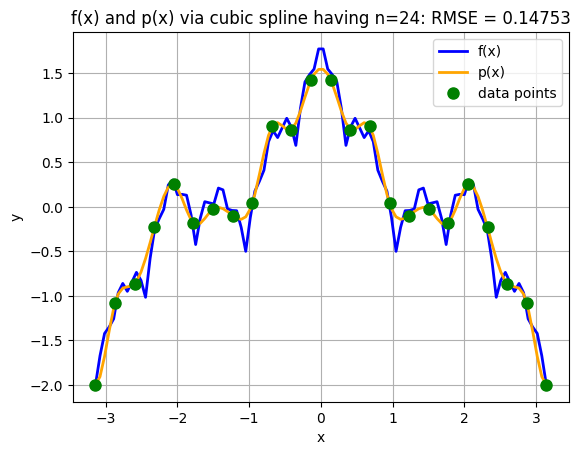

In [23]:
# plot your results as according to following example, you must provide RMSE Value as well
n = 24
x = np.linspace(-np.pi, np.pi, n)
y = W(x)
dy0 = dW(x[0])    # Derivative at the left boundary
dyN = dW(x[-1])

spline_coeffs = MyCubicSpline(x, y, dy0, dyN)
xx = np.linspace(-np.pi, np.pi, 100)
yy = EvalCubicSpline(x, y, spline_coeffs, xx)
y_actual = W(xx)
rmse_value = RMSE(y_actual, yy)

plt.plot(xx, y_actual, 'b-', label='f(x)', linewidth=2)
plt.plot(xx, yy, 'orange', label='p(x)', linewidth=2)
plt.plot(x, y, 'go', label='data points', markersize=8)
plt.title(f"f(x) and p(x) via cubic spline having n=24: RMSE = {rmse_value:.5f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

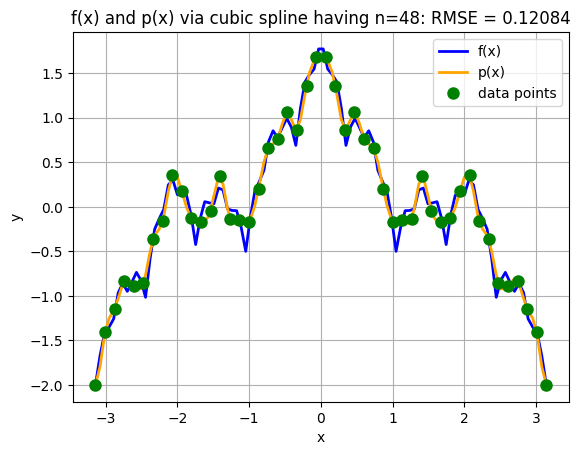

In [24]:
# plot your results as according to following example, you must provide RMSE Value as well
n = 48
x = np.linspace(-np.pi, np.pi, n)
y = W(x)
dy0 = dW(x[0])
dyN = dW(x[-1])

spline_coeffs = MyCubicSpline(x, y, dy0, dyN)
xx = np.linspace(-np.pi, np.pi, 100)
yy = EvalCubicSpline(x, y, spline_coeffs, xx)
y_actual = W(xx)
rmse_value = RMSE(y_actual, yy)

plt.plot(xx, y_actual, 'b-', label='f(x)', linewidth=2)
plt.plot(xx, yy, 'orange', label='p(x)', linewidth=2)
plt.plot(x, y, 'go', label='data points', markersize=8)

plt.title(f"f(x) and p(x) via cubic spline having n=48: RMSE = {rmse_value:.5f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()